In [1]:
# Import essential libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Resizing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [3]:
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# Visualize sample training images
def visualize_images():
    plt.figure(figsize=(10, 4))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_train[i])
        plt.title(class_names[y_train[i][0]])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [5]:
# Build a deeper CNN model from scratch (improved for better accuracy)
def build_custom_cnn():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    return model

In [6]:
# Train the CNN model
def train_custom_cnn():
    model = build_custom_cnn()
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=15,
                        batch_size=64, validation_split=0.1)
    
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"\n[Custom CNN] Test Accuracy: {test_acc * 100:.2f}%")
    return model, history

In [7]:
# Build ResNet50 Transfer Learning Model
def build_resnet50_transfer_model():
    # Input layer for CIFAR-10 (32x32x3)
    inputs = Input(shape=(32, 32, 3))

    # Resize input to match ResNet50 expected input size
    x = Resizing(224, 224)(inputs)

    # Load ResNet50 base (exclude top layer, use pre-trained ImageNet weights)
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    base_model.trainable = False  # Freeze base model

    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

In [8]:
# Train the ResNet50 model
def train_resnet50_model():
    model = build_resnet50_transfer_model()
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"\n[ResNet50 Transfer Learning] Test Accuracy: {test_acc * 100:.2f}%")
    return model, history

In [9]:
# Plotting Function for Accuracy and Loss
def plot_training_history(history, title_prefix=""):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title_prefix} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title_prefix} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [10]:
# Final combined comparison for CNN vs ResNet50
def plot_comparison(cnn_history, resnet_history):
    plt.figure(figsize=(12, 5))

    # Accuracy Comparison
    plt.subplot(1, 2, 1)
    plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
    plt.plot(resnet_history.history['val_accuracy'], label='ResNet50 Validation Accuracy')
    plt.title('CNN vs ResNet50 - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss Comparison
    plt.subplot(1, 2, 2)
    plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
    plt.plot(resnet_history.history['val_loss'], label='ResNet50 Validation Loss')
    plt.title('CNN vs ResNet50 - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Sample CIFAR-10 images


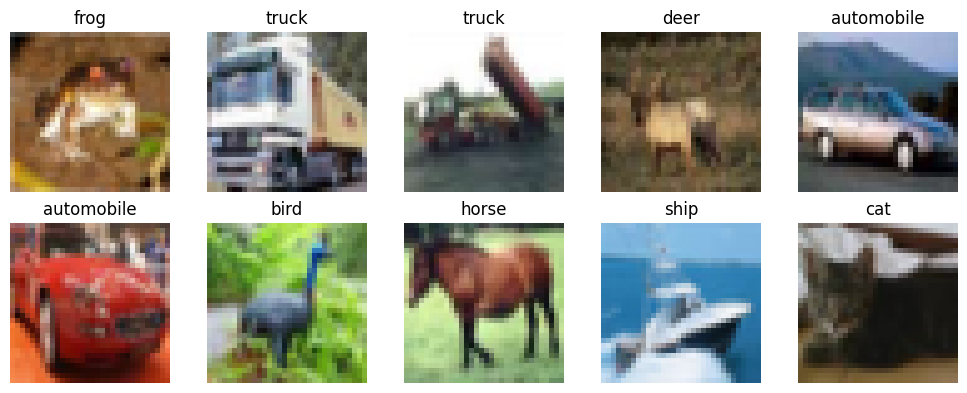


Training Custom CNN Model...


C:\Users\thris\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 445s 597ms/step - accuracy: 0.1773 - loss: 2.3972 - val_accuracy: 0.3650 - val_loss: 1.8547
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 383s 540ms/step - accuracy: 0.2682 - loss: 1.8733 - val_accuracy: 0.4378 - val_loss: 1.6145
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 382s 543ms/step - accuracy: 0.3056 - loss: 1.7629 - val_accuracy: 0.4472 - val_loss: 1.4754
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 397s 564ms/step - accuracy: 0.4016 - loss: 1.5448 - val_accuracy: 0.5396 - val_loss: 1.3654
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 375s 532ms/step - accuracy: 0.5422 - loss: 1.2537 - val_accuracy: 0.6822 - val_loss: 0.9243
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 364s 517ms/step - accuracy: 0.6330 - loss: 1.0383 - val_accuracy: 0.6820 - val_loss: 0.9555
Epoch 7/15
133/704 ━━━━━━━━━━━━━━━━━━━━ 4:45 499ms/step - accuracy: 0.6735 - loss: 0.9456

In [ ]:
# MAIN EXECUTION
if __name__ == "__main__":
    print("Sample CIFAR-10 images")
    visualize_images()

    print("\nTraining Custom CNN Model...")
    cnn_model, cnn_history = train_custom_cnn()
    plot_training_history(cnn_history, "Custom CNN")

    print("\nTraining ResNet50 Transfer Learning Model...")
    resnet_model, resnet_history = train_resnet50_model()
    plot_training_history(resnet_history, "ResNet50")

    print("\nFinal Comparison: Custom CNN vs ResNet50")
    plot_comparison(cnn_history, resnet_history)